## Task-01 Prediction using Supervised ML
## Submitted By - Muthu Krishnan
### Linear Regression with Python Scikit Learn
In this section we will explore how the Python Scikit-Learn library for machine learning can be used to implement simple linear regression. This task involves with just two variables.

## Simple Linear Regression


Here we are going to predict the percentage of marks of an student based on the number of study hours

In [1]:
# import all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Loading the Student scores dataset

In [2]:
score_data=pd.read_csv(r'C:\Users\Lenovo\Desktop\GRIP Spark Foundation Internship\student_scores.csv')

In [6]:
# Let's explore our dataset a bit. Execute the following code to check the shape of the dataset
score_data.shape

(25, 2)

In [7]:
# This dataset has 25 rows and 2 columns.

#### Printing the first 10 records

In [11]:
# This head() retrieves the first 10 records from the dataset.
score_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
# To see the statistical details of the dataset, we can use describe()
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
# let's plot 2D graph to visualize the relationship between the two variables. 
# We can create the plot with the following code


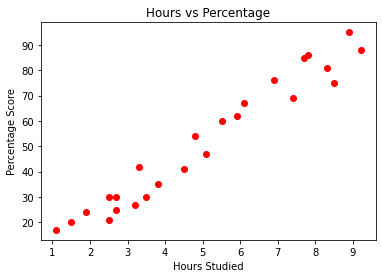

In [18]:
plt.plot(score_data['Hours'],score_data['Scores'],'ro')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [19]:
# From the graph we can see that there is a positive linear correlation between the Hours studied and Percentage

In [21]:
# Next we can divide the dataset for prediction
# we can divide it in to attribute variable and target variable
# Attribute variable be Hours column and Target variable is the Scores

### Preparing the dataset

In [22]:
# Here we can use iloc to assign the values of the variable in to X and y

In [26]:
X = score_data.iloc[:, :-1].values
y = score_data.iloc[:, 1].values

In [27]:
# Here (-1) specifies that it will store all the columns except the last column 
# and likewise (1) specifies the second column since th column index starts with 0

In [28]:
# Next step is to split the training and testing dataset.
# We can do this by using the train_test_split() method included in the Scikit-Learn's library

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# The above code split 80% to the training dataset and 20% to the test dataset.
# test_size variable specifies the 80-20 proportion of the dataset

In [33]:
# we have completed our dataset splitting. Now we have to train our algorithm.
# We can execute the following code

### Training the algorithm

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
# With Scikit-Learn you can import the Linear Regression model
# Then import the LinearRegress class, instantiate it and then call fit() method

In [37]:
# Linear Regression basically finds the best value of the intercept and slope.

In [38]:
# To see the value of the intercept and slope we can use the following code

In [39]:
print(regressor.intercept_)


2.018160041434683


In [40]:
print(regressor.coef_)


[9.91065648]


In [41]:
# If a student studies one hour more than previous studieh hours, 
# then the student can see the increase of the percentage scrore by 9.91.

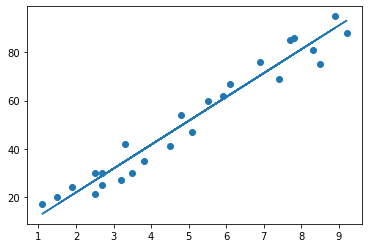

In [43]:
# Plotting the scatterplot to visualize the intercept and slope
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [42]:
# Now its time to make predictions

### Making predictions

In [44]:
# Now we can user oru test data to check how actually our trained algorithm predicted the score

In [45]:
# Execute the following code for prediction

In [46]:
y_pred = regressor.predict(X_test)


In [47]:
# y_pred predicts the value for the X_test series

In [48]:
# To compare the actual output values for X_test with the predicted values, execute the following code

In [49]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [50]:
# Our mode will predict the values close to the actual values

In [51]:
# Lets evaluate the algorithm

### Evaluating the algorithm

In [53]:
# Here we can evaluate the performance of the algorithm

In [54]:
#For regression algorithms three common metrics will be used.
## Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)

In [55]:
# The Scikit-Learn library comes with pre-built functions that helps to find the values for these metrics

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [57]:
#You can see that the value of root mean squared error is 4.64, 
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
# This means that our algorithm did good work on predictions.